In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/newly-built-bus-stations-in-uzbekistan/1-003-0014.xlsx


In [2]:
df = pd.read_excel('/kaggle/input/newly-built-bus-stations-in-uzbekistan/1-003-0014.xlsx')
df.head()

,№,Name of the legal entity,The name of the auto station,Administrative-territorial connection of the object,Connecting to other topographical objects,Latitude,Longitude
0,1,Андижон вилояти,&,&,&,&,&
1,2,"""Ҳаракатчи"" МЧЖ","""Узумзор"" автостанцияси",Андижон шаҳри,"Ўзбекистон кўчаси, \n281 уй",40.78296,72.281548
2,3,"""Ҳаракатчи"" МЧЖ","""Андижон"" автовокзали",Андижон шаҳри,"Амир Темир кўчаси, 20",40.759743,72.34857
3,4,"""ҒАВС"" МЧЖ","""ҒАВС"" автостанцияси",Андижон шаҳри,"Андижон-Асака йўли, 1-уй",40.736332,72.319989
4,5,"""Мунаввара Савдо саноат"" МЧЖ","""Қўшариқ"" автостанцияси",Андижон шаҳри,"Қўшариқ даҳаси, 32-а уй",40.814987,72.331607


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   №                                                    173 non-null    int64 
 1   Name of the legal entity                             173 non-null    object
 2   The name of the auto station                         173 non-null    object
 3   Administrative-territorial connection of the object  173 non-null    object
 4   Connecting to other topographical objects            173 non-null    object
 5   Latitude                                             173 non-null    object
 6   Longitude                                            173 non-null    object
dtypes: int64(1), object(6)
memory usage: 9.6+ KB


In [4]:
df.isnull().sum()

№                                                      0
Name of the legal entity                               0
The name of the auto station                           0
Administrative-territorial connection of the object    0
Connecting to other topographical objects              0
Latitude                                               0
Longitude                                              0
dtype: int64

In [5]:
region_counts = df['Administrative-territorial connection of the object'].value_counts()
print(region_counts)

Administrative-territorial connection of the object
&                  14
Андижон шаҳри       5
Самарқанд шаҳри     4
Асака тумани        3
Кармана тумани      3
                   ..
Ургут тумани        1
Иштихон тумани      1
Нуробод тумани      1
Нарпай тумани       1
Бектемир тумани     1
Name: count, Length: 125, dtype: int64


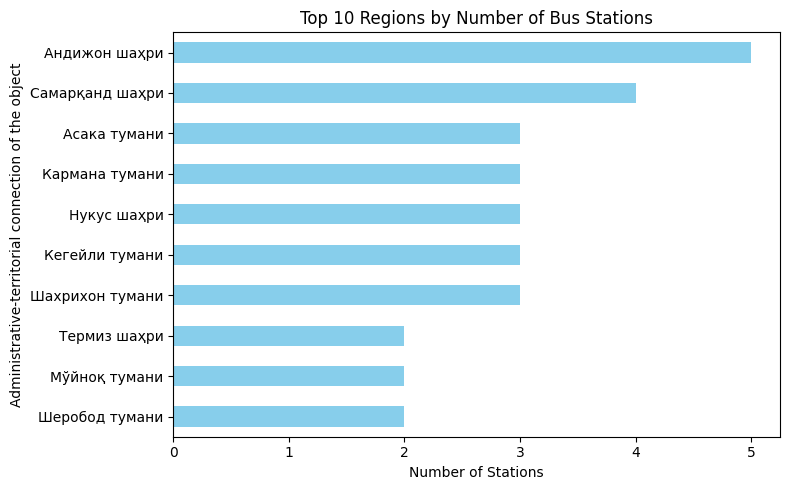

In [6]:
import matplotlib.pyplot as plt

top_regions = df['Administrative-territorial connection of the object'].value_counts().drop("&").head(10)
top_regions.plot(kind='barh', figsize=(8, 5), color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Regions by Number of Bus Stations')
plt.xlabel('Number of Stations')
plt.tight_layout()
plt.show()

In [7]:
operator_counts = df['Name of the legal entity'].value_counts()
print(operator_counts.head(10))

Name of the legal entity
"Ўзавтовокзал сервис" ДУК                    10
"Ҳаракатчи" МЧЖ                               2
 "Ўзавтовокзал сервис" ДУК Бухоро филиали     2
"Автошохбекат" МЧЖ                            2
"Шахрисабз" автостанцияси                     1
"Ният" МЧЖ                                    1
"Янгиер хусусий автошох бекати" ХФ            1
"S-Boyjigit" МЧЖ                              1
Қашқадарё вилояти                             1
"Бешкент" автостанцияси                       1
Name: count, dtype: int64


In [8]:
has_coords = df[
    ~df['Latitude'].astype(str).str.contains("&") &
    ~df['Longitude'].astype(str).str.contains("&")
]

print(f"Stations with valid coordinates: {len(has_coords)} out of {len(df)}")

Stations with valid coordinates: 159 out of 173


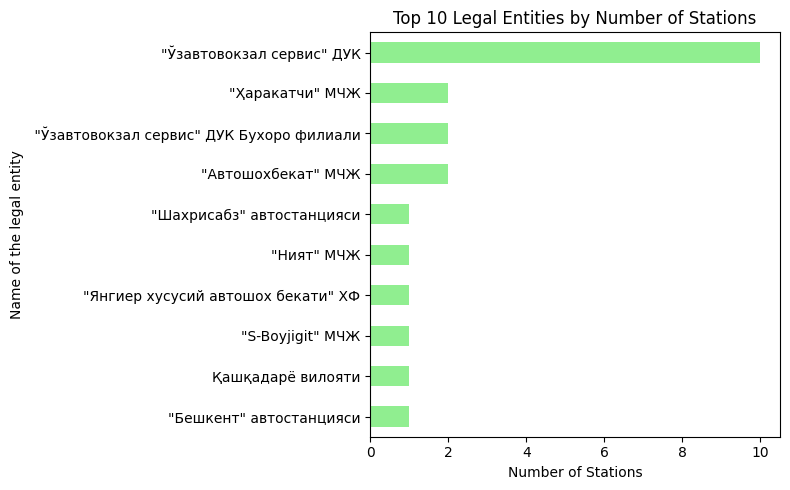

In [9]:
top_operators = df['Name of the legal entity'].value_counts().head(10)
top_operators.plot(kind='barh', figsize=(8, 5), color='lightgreen')
plt.gca().invert_yaxis()
plt.title('Top 10 Legal Entities by Number of Stations')
plt.xlabel('Number of Stations')
plt.tight_layout()
plt.show()

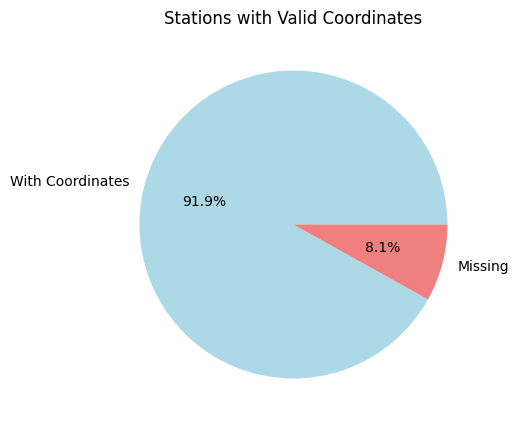

In [10]:
has_coords = (
    ~df['Latitude'].astype(str).str.contains("&") &
    ~df['Longitude'].astype(str).str.contains("&")
)
missing_coords = df.shape[0] - has_coords.sum()

plt.figure(figsize=(5, 5))
plt.pie([has_coords.sum(), missing_coords], labels=["With Coordinates", "Missing"], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Stations with Valid Coordinates')
plt.show()